In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [442]:
#input values - array of wavelengths

p_wave = np.linspace(320,480,300)
o_wave = np.linspace(720,880,300)

#differences

p_diff = np.subtract(400,p_wave)
o_diff = np.subtract(800,o_wave)

#central wavelength values

p_wave_central = 400
o_wave_central = 800

#conversion from nanometers to micrometers

def nano_to_micro(value):
    return np.multiply(value, 0.001)

#conversion from nanometers to meters

def nano_to_meters(value_nano):
    return np.multiply(value_nano, 1e-9)

#Sellmeier functions in micrometers

def sellmeier_ne(freq_o_central):
    o_wave_nm = freq_to_wave(freq_o_central)*1e9
    o_wave_micro = (nano_to_micro(o_wave_nm))
    ne_step_1 = np.divide(0.01224,np.subtract(np.power(o_wave_micro,2),0.01667))
    ne_step_2 = np.multiply(0.01516,np.power(o_wave_micro,2))
    ne = np.sqrt(np.add (2.3753, np.subtract(ne_step_1, ne_step_2)))
    return ne

def sellmeier_no(freq_o_central):
    o_wave_nm = freq_to_wave(freq_o_central)*1e9
    o_wave_micro = (nano_to_micro(o_wave_nm))
    no_step_1 = np.divide(0.01878,np.subtract(np.power(o_wave_micro,2),0.01822))
    no_step_2 = np.multiply(0.01354,np.power(o_wave_micro,2))
    no = np.sqrt(np.add(2.7359, np.subtract(no_step_1, no_step_2)))
    return no

#Sellmeier derivatives

# ----ne----

# ne first derivative

def sellmeier_ne_first(freq_o_central):
    o_wave_nm = freq_to_wave(freq_o_central)*1e9
    o_wave_micro = (nano_to_micro(o_wave_nm))
    ne_first_step_1 = np.multiply(np.add(np.multiply(np.power(np.subtract(np.power(o_wave_micro, 2), 0.0167), 2), 0.0098), 0.00794), o_wave_micro)
    ne_first_step_2 = np.sqrt( - np.divide(np.subtract(np.multiply(np.subtract(np.multiply(np.power(o_wave_micro, 2), 0.00638), 1), np.subtract(np.power(o_wave_micro, 2), 0.0167)), 0.00515), np.subtract(np.power(o_wave_micro, 2), 0.0167)))
    ne_first_step_3 = np.power(np.subtract(np.power(o_wave_micro, 2), 0.0167), 2)
    return np.divide( - ne_first_step_1, np.multiply(ne_first_step_2, ne_first_step_3))

# ne second derivative

def sellmeier_ne_second(freq_o_central):
    o_wave_nm = freq_to_wave(freq_o_central)*1e9
    o_wave_micro = (nano_to_micro(o_wave_nm))
    ne_second_step_1 = np.multiply(-0.0000628, np.multiply(np.sqrt(np.divide(np.add(np.multiply(np.subtract(1, np.multiply(np.power(o_wave_micro, 2), 0.00638)), np.subtract(np.power(o_wave_micro, 2), 0.0167)), 0.00515), np.subtract(np.power(o_wave_micro, 2), 0.0167))), np.power(o_wave_micro, 2)))
    ne_second_step_2 = np.power(np.add(np.power(np.subtract(np.power(o_wave_micro, 2), 0.0167), 2), 0.8074), 2) 
    ne_second_step_3 = np.power(np.divide(np.add(np.multiply(np.subtract(1, np.multiply(np.power(o_wave_micro, 2), 0.00638)), np.subtract(np.power(o_wave_micro, 2), 0.0167)), 0.00515), np.subtract(np.power(o_wave_micro, 2), 0.0167)), 1.5)
    ne_second_step_4 = np.multiply(np.subtract(np.power(o_wave_micro, 2), 0.0167), np.add(np.subtract(np.multiply(0.0238, np.power(o_wave_micro, 2)), np.multiply(0.0098, np.power(np.subtract(np.power(o_wave_micro, 2), 0.0167), 3))), 0.000132))
    ne_second_numerator = np.add(np.multiply(ne_second_step_1, ne_second_step_2), np.multiply(ne_second_step_3, ne_second_step_4))
    ne_second_step_5 = np.power(np.divide(np.add(np.multiply(np.subtract(1, np.multiply(np.power(o_wave_micro, 2), 0.00638)), np.subtract(np.power(o_wave_micro, 2), 0.0167)), 0.00515), np.subtract(np.power(o_wave_micro, 2), 0.0167)), 2)
    ne_second_step_6 = np.power(np.subtract(np.power(o_wave_micro, 2), 0.0167), 4)
    ne_second_denominator = np.multiply(ne_second_step_5, ne_second_step_6)
    return np.divide(ne_second_numerator, ne_second_denominator)

#----no----

# no first derivative

def sellmeier_no_first(freq_o_central):
    o_wave_nm = freq_to_wave(freq_o_central)*1e9
    o_wave_micro = (nano_to_micro(o_wave_nm))
    no_first_step_1 = np.multiply(np.add(np.multiply(np.power(np.subtract(np.power(o_wave_micro, 2), 0.01878), 2), 0.00818), 0.001135), o_wave_micro)
    no_first_step_2 = np.sqrt( - np.divide(np.subtract(np.multiply(np.subtract(np.multiply(np.power(o_wave_micro, 2), 0.00495), 1), np.subtract(np.power(o_wave_micro, 2), 0.01878)), 0.006864), np.subtract(np.power(o_wave_micro, 2), 0.01878)))
    no_first_step_3 = np.power(np.subtract(np.power(o_wave_micro, 2), 0.01878), 2)
    return np.divide( - no_first_step_1, np.multiply(no_first_step_2, no_first_step_3))

# no second derivative

def sellmeier_no_second(freq_o_central):
    o_wave_nm = freq_to_wave(freq_o_central)*1e9
    o_wave_micro = (nano_to_micro(o_wave_nm))
    no_second_step_1 = np.multiply(-0.00007793, np.multiply(np.sqrt(np.divide(np.add(np.multiply(np.subtract(1, np.multiply(np.power(o_wave_micro, 2), 0.00495)), np.subtract(np.power(o_wave_micro, 2), 0.01878)), 0.00686), np.subtract(np.power(o_wave_micro, 2), 0.01878))), np.power(o_wave_micro, 2)))
    no_second_step_2 = np.power(np.add(np.multiply(np.power(np.subtract(np.power(o_wave_micro, 2), 0.01878), 2), 0.7209), 1), 2)
    no_second_step_3 = np.power(np.divide(np.add(np.multiply(np.subtract(1, np.multiply(np.power(o_wave_micro, 2), 0.00495)), np.subtract(np.power(o_wave_micro, 2), 0.01878)), 0.0068), np.subtract(np.power(o_wave_micro, 2), 0.01878)), 1.5)
    no_second_step_4 = np.multiply(np.subtract(np.power(o_wave_micro, 2), 0.01878), np.add(np.subtract(np.multiply(0.03406, np.power(o_wave_micro, 2)), np.multiply(0.00818, np.power(np.subtract(np.power(o_wave_micro, 2), 0.01878), 3))), 0.0002132))
    no_second_numerator = np.add(np.multiply(no_second_step_1, no_second_step_2), np.multiply(no_second_step_3, no_second_step_4))
    no_second_step_5 = np.power(np.divide(np.add(np.multiply(np.subtract(1, np.multiply(np.power(o_wave_micro, 2), 0.00495)), np.subtract(np.power(o_wave_micro, 2), 0.01878)), 0.006864), np.subtract(np.power(o_wave_micro, 2), 0.01878)), 2)
    no_second_step_6 = np.power(np.subtract(np.power(o_wave_micro, 2), 0.01878), 4)
    no_second_denominator = np.multiply(no_second_step_5, no_second_step_6)
    return np.divide(no_second_numerator, no_second_denominator)

#conversion between wavelength and frequency

def wave_to_freq(value_wave):
    wave_meters = nano_to_meters(value_wave)
    freq_hz = np.divide(3e8, wave_meters)
    return freq_hz 

def freq_to_wave(value_freq):
    wave_m = np.divide(3e8, value_freq)
    return wave_m 

In [443]:
#Wavevector equations

def ke(freq_o_central):
    return np.divide(np.multiply(sellmeier_ne(freq_o_central),freq_o_central),3e8)
    
def ko(freq_o_central):
    return np.divide(np.multiply(sellmeier_no(freq_o_central),freq_o_central),3e8)

#Wavevector derivatives

#for ke

def ke_first_der(freq_o_central):
    return np.divide(np.add(np.multiply(sellmeier_ne_first(freq_o_central), freq_o_central), sellmeier_ne(freq_o_central)), 3e8)
    

def ke_second_der(freq_o_central):
    return np.divide(np.add(np.multiply(sellmeier_ne_second(freq_o_central), freq_o_central), np.multiply(2, sellmeier_ne_first(freq_o_central))), 3e8)

#for ko

def ko_first_der(freq_o_central):
    return np.divide(np.add(np.multiply(sellmeier_no_first(freq_o_central), freq_o_central), sellmeier_no(freq_o_central)), 3e8)

def ko_second_der(freq_o_central):
    return np.divide(np.add(np.multiply(sellmeier_no_second(freq_o_central), freq_o_central), np.multiply(2, sellmeier_no_first(freq_o_central))), 3e8)

print(ke_first_der(wave_to_freq(2*o_wave_central)))
print(ko_first_der(wave_to_freq(o_wave_central)))


-11107.25768346372
-11077.50110165934


In [466]:
#define nu_o

nu_o_1 = np.subtract(wave_to_freq(o_wave), wave_to_freq(o_wave_central))

#First order contribution

def k_first_order(o_wave_central, p_wave, nu_o_1):
    freq_o_central = wave_to_freq(o_wave_central)
    freq_p = wave_to_freq(p_wave)
    ke_cons = ke_first_der(2 * freq_o_central)
    ko_cons = ko_first_der(freq_o_central)
    mult_same_rows = np.array([[i] * len(nu_o_1) for i in nu_o_1])
    mult_same_cols = np.full(shape=len(freq_p) ** 2, fill_value=1).reshape(len(freq_p), len(freq_p)) * nu_o_1
    mult_summation = np.add(mult_same_rows, mult_same_cols )
    step_1 = np.multiply(ke_cons, mult_summation)
    step_2 = np.multiply(ko_cons, mult_summation)
    return np.subtract(step_1, step_2)

#Second order contribution 

def k_second_order(o_wave_central, p_wave, nu_o_1):
    freq_o_central = wave_to_freq(o_wave_central)
    freq_p = wave_to_freq(p_wave)
    ke_cons = ke_second_der(2 * freq_o_central)
    ko_cons = ko_second_der(freq_o_central)
    mult_same_rows = np.array([[i] * len(nu_o_1) for i in nu_o_1])
    mult_same_cols = np.full(shape=len(freq_p) ** 2, fill_value=1).reshape(len(freq_p), len(freq_p)) * nu_o_1
    mult_summation = np.add(mult_same_rows, mult_same_cols)
    mult_same_rows_sq = np.power(np.array([[i] * len(nu_o_1) for i in nu_o_1]), 2)
    mult_same_cols_sq = np.power(np.full(shape=len(freq_p) ** 2, fill_value=1).reshape(len(freq_p), len(freq_p)) * nu_o_1, 2)
    mult_summation_sq = np.add(mult_same_rows_sq, mult_same_cols_sq)
    step_1 = np.multiply(ke_cons, np.power(mult_summation, 2))
    step_2 = np.multiply(ko_cons, mult_summation_sq)
    return np.multiply(np.subtract(step_1, step_2), 0.5)

print(k_first_order(o_wave_central, p_wave, nu_o_1))
print(k_second_order(o_wave_central, p_wave, nu_o_1))

[[-3.15529926e+19 -3.14358259e+19 -3.13188331e+19 ... -3.02562943e+18
  -2.94699384e+18 -2.86845388e+18]
 [-3.14358259e+19 -3.13186592e+19 -3.12016664e+19 ... -2.90846273e+18
  -2.82982714e+18 -2.75128718e+18]
 [-3.13188331e+19 -3.12016664e+19 -3.10846736e+19 ... -2.79146993e+18
  -2.71283434e+18 -2.63429438e+18]
 ...
 [-3.02562943e+18 -2.90846273e+18 -2.79146993e+18 ...  2.55017338e+19
   2.55803694e+19  2.56589093e+19]
 [-2.94699384e+18 -2.82982714e+18 -2.71283434e+18 ...  2.55803694e+19
   2.56590050e+19  2.57375449e+19]
 [-2.86845388e+18 -2.75128718e+18 -2.63429438e+18 ...  2.56589093e+19
   2.57375449e+19  2.58160849e+19]]
[[ 1.10270140e+34  1.09452697e+34  1.08639452e+34 ... -4.54047937e+31
  -5.14170943e+31 -5.72875832e+31]
 [ 1.09452697e+34  1.08638344e+34  1.07828185e+34 ... -5.19022131e+31
  -5.77070958e+31 -6.33704191e+31]
 [ 1.08639452e+34  1.07828185e+34  1.07021107e+34 ... -5.80915080e+31
  -6.36892807e+31 -6.91457458e+31]
 ...
 [-4.54047937e+31 -5.19022131e+31 -5.8091508

In [483]:
#Phasematching function

#length L of the crystal in meters ?

L = 1e-3 #confirm the value

def phasematch_func(o_wave_central, p_wave):
    #print(k_second_order(o_wave_central,p_wave, nu_o))
    step_1 = np.exp(np.multiply(np.divide(np.multiply(1j, k_second_order(o_wave_central, p_wave, nu_o_1)),L),2))
    #step_2 = np.exp(np.multiply(-0.193, np.power(np.multiply(k_first_order(o_wave_central, p_wave, nu_o), L/2), 2)))
    step_2 = np.sinc(np.divide(np.multiply(k_first_order(o_wave_central, p_wave, nu_o_1), L), 2))
    return np.multiply(step_1, step_2)

#print(phasematch_func(o_wave_central, p_wave)) 

#Pump function

def pump_func(p_wave, nu_o_1):
    sigma = np.divide(0.5 * wave_to_freq(p_wave[-1]-p_wave[1]), np.sqrt(2 * np.log(2)))
    nu_o_first = np.array([[i] * len(nu_o_1) for i in nu_o_1])
    nu_o_second = np.full(shape=len(p_wave) ** 2, fill_value=1).reshape(len(p_wave), len(p_wave)) * nu_o_1
    nu_o_sum = np.add(nu_o_first, nu_o_second)
    return np.exp(-np.power(np.divide(nu_o_sum, sigma), 2))

#print(pump_func(p_wave, nu_o_1))

In [484]:
#Product of the phasematching function and the pump function

def joint_amp(o_wave_central, p_wave, nu_o_1):
    return np.multiply(phasematch_func(o_wave_central, p_wave), pump_func(p_wave, nu_o_1))

In [485]:
print(joint_amp(o_wave_central, p_wave, nu_o_1))

[[ 1.33646421e-17-1.31066556e-17j -1.50993572e-17+1.31072354e-17j
   3.11854864e-18+1.96196479e-17j ... -1.75127897e-16+6.88164957e-17j
   1.77519062e-16+6.20214495e-17j -1.03183197e-16-1.09225675e-16j]
 [-1.50993572e-17+1.31072354e-17j -7.91548167e-18+1.59935239e-17j
   1.51615023e-19+7.98389605e-18j ...  8.99604629e-17-1.97808650e-16j
   8.78222870e-17-1.67952753e-16j  2.10936646e-16+7.69462394e-17j]
 [ 3.11854864e-18+1.96196479e-17j  1.51615023e-19+7.98389605e-18j
  -3.76821503e-18-4.03146288e-19j ... -1.14288860e-17-1.27060630e-18j
   2.15004906e-16-9.25013399e-17j -1.70148003e-17+1.52353492e-16j]
 ...
 [-1.75127897e-16+6.88164957e-17j  8.99604629e-17-1.97808650e-16j
  -1.14288860e-17-1.27060630e-18j ...  2.84062853e-20-1.41590407e-19j
   2.00107955e-17-1.11489357e-17j -1.68300809e-17-4.40599132e-18j]
 [ 1.77519062e-16+6.20214495e-17j  8.78222870e-17-1.67952753e-16j
   2.15004906e-16-9.25013399e-17j ...  2.00107955e-17-1.11489357e-17j
  -1.61450866e-17+5.39037846e-18j  1.87040475e-

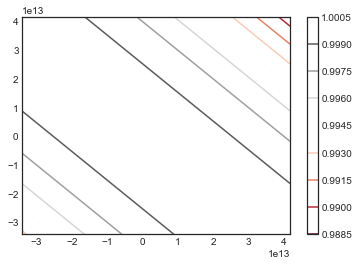

In [528]:
#plt.plot(nu_o_1, pump_func(p_wave, nu_o_1))
plt.contour(nu_o_1, nu_o_1,  pump_func(p_wave, nu_o_1), cmap='RdGy')
plt.colorbar();
#plt.ylim(5e13, 5e13)
#plt.xlim(5e13, 5e13)

In [525]:
delta_k = 12
L = 1e-3
y = -0.193

first = np.sinc(delta_k * L / 2)
approx = np.exp(np.power(delta_k * L / 2, 2) * y)

print(first, approx)

0.9999407834256027 0.9999930520241372
